In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
df = pd.read_csv('sampled_aml_df_3.csv')

df.head()

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1577509,155,CASH_OUT,427818.23,C1431817875,198219.00,0.00,C2131020093,0.00,427818.23,0,0
1,3869859,283,CASH_IN,68154.77,C397915380,2884459.21,2952613.98,C105277746,1030035.29,961880.52,0,0
2,5516324,380,CASH_OUT,80828.54,C809484944,0.00,0.00,C226553176,5149991.49,5230820.04,0,0
3,5490462,380,TRANSFER,106069.89,C1857104283,301258.00,195188.11,C1759851095,263816.83,369886.72,0,0
4,5606765,394,PAYMENT,34530.86,C1774638089,200755.00,166224.14,M1074240731,0.00,0.00,0,0


# explotary data analysis

In [37]:
df.shape

(192500, 12)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192500 entries, 0 to 192499
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           192500 non-null  int64  
 1   step            192500 non-null  int64  
 2   type            192500 non-null  object 
 3   amount          192500 non-null  float64
 4   nameOrig        192500 non-null  object 
 5   oldbalanceOrg   192500 non-null  float64
 6   newbalanceOrig  192500 non-null  float64
 7   nameDest        192500 non-null  object 
 8   oldbalanceDest  192500 non-null  float64
 9   newbalanceDest  192500 non-null  float64
 10  isFraud         192500 non-null  int64  
 11  isFlaggedFraud  192500 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 17.6+ MB


In [39]:
df.isnull().sum()

index             0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [40]:
df.describe()

,index,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.925000e+05,192500.000000,1.925000e+05,1.925000e+05,1.925000e+05,1.925000e+05,1.925000e+05,192500.000000,192500.000000
mean,3.217914e+06,247.825377,2.261676e+05,8.616604e+05,8.270867e+05,1.084274e+06,1.230771e+06,0.038961,0.000083
std,1.861619e+06,147.685363,7.720697e+05,2.912266e+06,2.887263e+06,3.297716e+06,3.575349e+06,0.193503,0.009116
min,2.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.593112e+06,156.000000,1.401661e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.216306e+06,249.000000,8.060089e+04,1.696019e+04,0.000000e+00,1.144710e+05,2.091728e+05,0.000000,0.000000
75%,4.835272e+06,347.000000,2.188217e+05,1.336372e+05,1.290969e+05,9.127214e+05,1.115385e+06,0.000000,0.000000
max,6.362619e+06,743.000000,6.988673e+07,5.958504e+07,4.958504e+07,2.511150e+08,2.506381e+08,1.000000,1.000000


In [64]:
#max amount in each type of transaction
df['amount'].groupby(df['type']).max()

type
CASH_IN      1588281.27
CASH_OUT    10000000.00
DEBIT         408672.22
PAYMENT       197201.17
TRANSFER    69886731.30
Name: amount, dtype: float64

In [41]:
# number of name dets and name origins
df['nameDest'].nunique(), df['nameOrig'].nunique()

(168929, 192494)

In [42]:
df = df.drop(labels = ['index' , 'nameOrig', 'nameDest'], axis = 1)

df.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
120086,258,PAYMENT,9940.00,0.00,0.00,0.00,0.00,0,0
89711,518,PAYMENT,1341.87,0.00,0.00,0.00,0.00,0,0
108164,34,CASH_OUT,203837.65,0.00,0.00,473979.16,677816.81,0,0
136266,8,CASH_OUT,32025.42,21138.00,0.00,0.00,32025.42,0,0
98358,11,PAYMENT,19598.84,1192108.08,1172509.23,0.00,0.00,0,0


In [43]:
df['isFraud'].value_counts()

0    185000
1      7500
Name: isFraud, dtype: int64

In [69]:
# avrage of variables in rancaction types and fraud
h = df.groupby(['type', 'isFraud'])
h.mean()

step        amount  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                            
CASH_IN  0        244.998442  1.679970e+05   3.601334e+06    3.769326e+06   
CASH_OUT 0        240.244046  1.741211e+05   4.378006e+04    1.809364e+04   
         1        367.316892  1.436458e+06   1.435118e+06    7.922769e+01   
DEBIT    0        240.713460  5.944322e+03   6.537474e+04    6.167146e+04   
PAYMENT  0        243.574340  1.313828e+04   6.854363e+04    6.208227e+04   
TRANSFER 0        246.495393  8.843084e+05   3.996599e+04    7.149212e+03   
         1        369.424242  1.483252e+06   1.863654e+06    4.020807e+05   

                  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                  
CASH_IN  0          1.612253e+06    1.493804e+06        0.000000  
CASH_OUT 0          1.515847e+06    1.707189e+06        0.000000  
         1          1.100083e+06    2.544684e+06        0.000000  
DEBIT    0          1.751657e+06    1.776573e+06        0.000000  
PAYMENT  0          0.000000e+00    0.000000e+00        0.000000  
TRANSFER 0          2.503439e+06    3.479945e+06        0.000000  
         1          5.402276e+02    3.221374e+03        0.004291

In [70]:
df_style= df.groupby('type').mean()
df_style

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
CASH_IN,244.998442,1.679970e+05,3.601334e+06,3.769326e+06,1.612253e+06,1.493804e+06,0.000000,0.000000
CASH_OUT,247.203276,2.432538e+05,1.199776e+05,1.710707e+04,1.493078e+06,1.753055e+06,0.054766,0.000000
DEBIT,240.713460,5.944322e+03,6.537474e+04,6.167146e+04,1.751657e+06,1.776573e+06,0.000000,0.000000
PAYMENT,243.574340,1.313828e+04,6.854363e+04,6.208227e+04,0.000000e+00,0.000000e+00,0.000000,0.000000
TRANSFER,270.444073,1.000993e+06,3.952521e+05,8.408874e+04,2.015831e+06,2.802618e+06,0.194817,0.000836


In [71]:
df_style.max()

step              2.704441e+02
amount            1.000993e+06
oldbalanceOrg     3.601334e+06
newbalanceOrig    3.769326e+06
oldbalanceDest    2.015831e+06
newbalanceDest    2.802618e+06
isFraud           1.948174e-01
isFlaggedFraud    8.359020e-04
dtype: float64

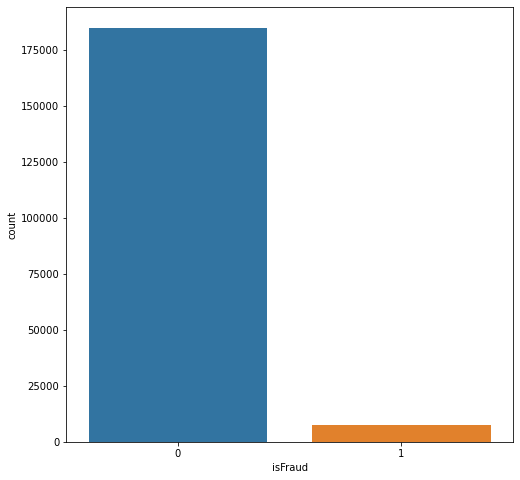

In [10]:
plt.figure(figsize = (8, 8))

sns.countplot(x='isFraud', data = df);

In [55]:
df_fraud= df.groupby('isFraud').mean()
df_fraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,242.938649,1.761585e+05,8.297742e+05,852510.993156,1.105796e+06,1.228731e+06,0.000000
1,368.364667,1.459724e+06,1.648186e+06,199954.355613,5.533905e+05,1.281069e+06,0.002133


In [52]:
df['isFlaggedFraud'].value_counts()

0    192484
1        16
Name: isFlaggedFraud, dtype: int64

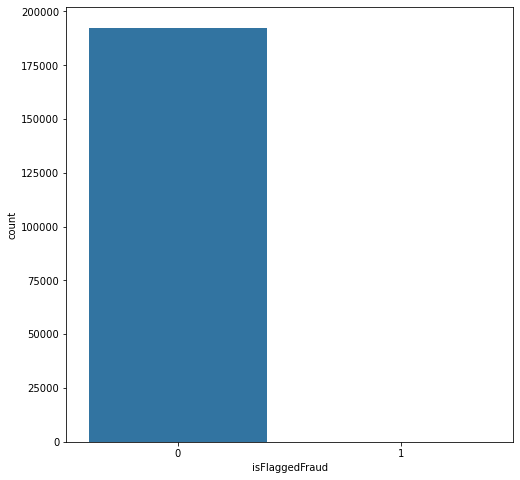

In [12]:
plt.figure(figsize = (8, 8))

sns.countplot(x='isFlaggedFraud', data = df);

<Figure size 576x576 with 0 Axes>

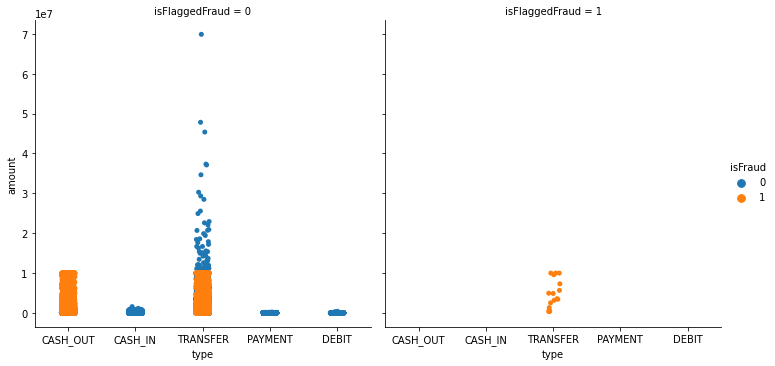

In [13]:
plt.figure(figsize = (8, 8))

sns.catplot(x = 'type', y = 'amount', estimator = sum, 
            hue = 'isFraud' , col = 'isFlaggedFraud',
            data = df);

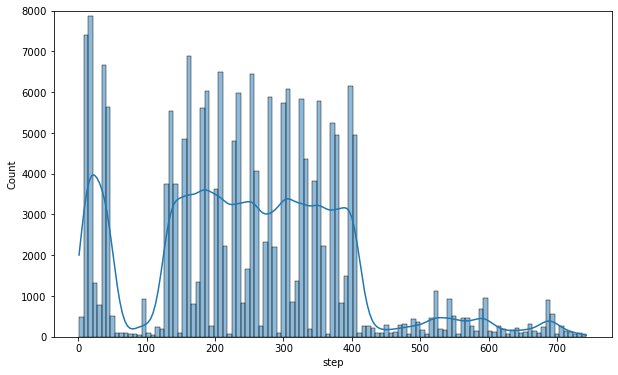

In [14]:
plt.figure(figsize = (10, 6))

plt.ylim([0, 8000])

sns.histplot(df['step'], kde = True);

Converting the 'step' variable into hour of the day form using modulus operator

In [15]:
df['step'] = df['step'] % 24

df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,11,CASH_OUT,427818.23,198219.00,0.00,0.00,427818.23,0,0
1,19,CASH_IN,68154.77,2884459.21,2952613.98,1030035.29,961880.52,0,0
2,20,CASH_OUT,80828.54,0.00,0.00,5149991.49,5230820.04,0,0
3,20,TRANSFER,106069.89,301258.00,195188.11,263816.83,369886.72,0,0
4,10,PAYMENT,34530.86,200755.00,166224.14,0.00,0.00,0,0


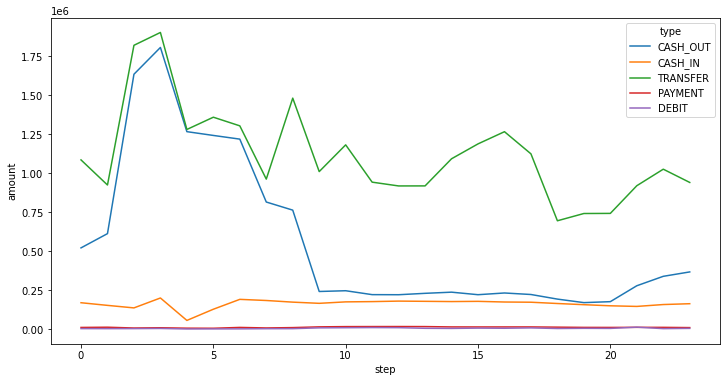

In [16]:
plt.figure(figsize = (12, 6))

sns.lineplot(x = 'step', y = 'amount', hue = 'type', ci = None,
             estimator = 'mean', data = df);

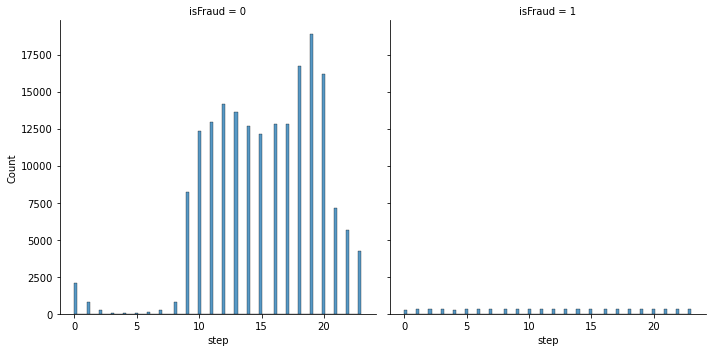

In [17]:
sns.displot(data = df, x = 'step', col = 'isFraud');

<AxesSubplot:xlabel='type', ylabel='count'>

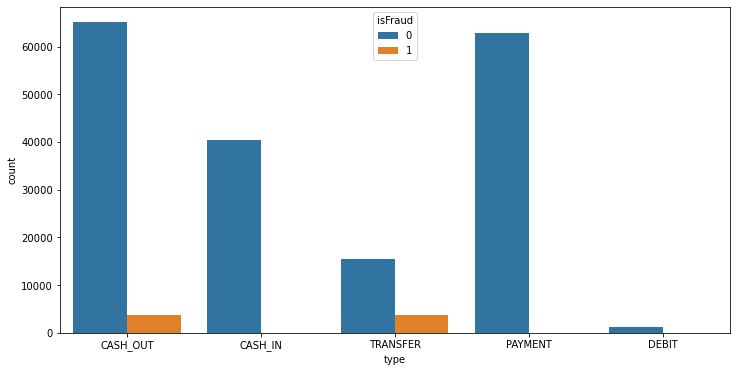

In [18]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'type', hue = 'isFraud', data = df)

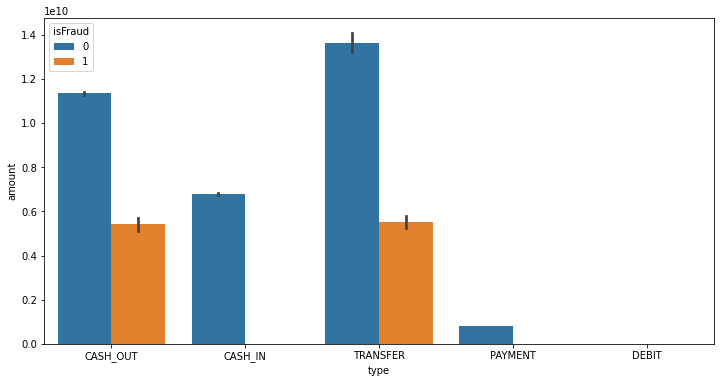

In [20]:
plt.figure(figsize = (12, 6))

sns.barplot(x = 'type', y = 'amount', estimator = sum, hue = 'isFraud', data = df);

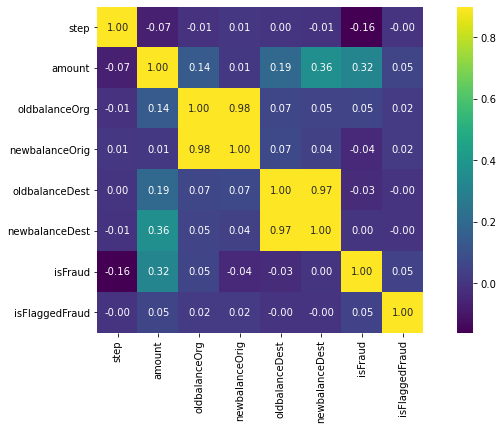

In [19]:
corrmat = df.corr()

ax = plt.subplots(figsize = (12, 6))

sns.heatmap(corrmat, vmax = 0.9, square = True, annot = True, fmt = '0.2f', cmap = 'viridis');

In [21]:
df = df.loc[(df.type == 'TRANSFER') | \
                                        (df.type == 'CASH_OUT')]
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,11,CASH_OUT,427818.23,198219.0,0.00,0.00,427818.23,0,0
2,20,CASH_OUT,80828.54,0.0,0.00,5149991.49,5230820.04,0,0
3,20,TRANSFER,106069.89,301258.0,195188.11,263816.83,369886.72,0,0
6,18,CASH_OUT,402832.90,11665.0,0.00,28550.98,431383.87,0,0
12,22,CASH_OUT,34643.49,0.0,0.00,346081.41,380724.90,0,0
